In [2]:
import numpy as np
import matplotlib.pyplot as plt

from  sklearn.decomposition import PCA

Задача 1
---

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.


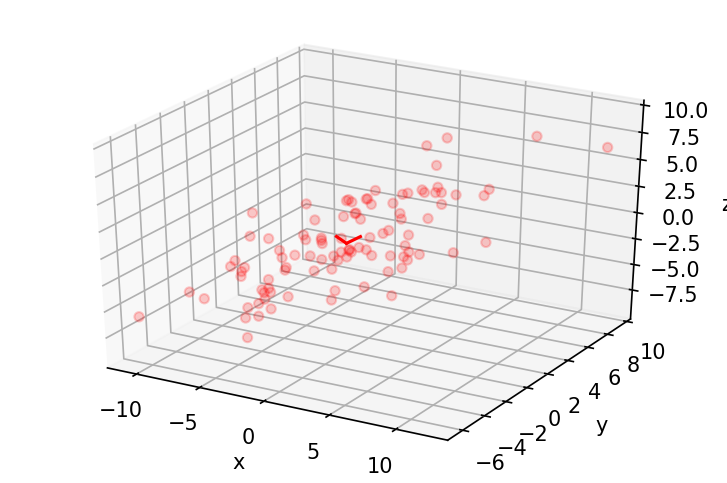

In [4]:
a = np.floor(10*np.random.random((3, 3)))
a = a + a.transpose()

X = np.random.multivariate_normal((0,0,0), a, 100)
x, y, z = X.transpose()

pca = PCA(n_components=2)
data = pca.fit_transform(X)
B = pca.transform(a)

fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, color="r", alpha=0.2)

x0, y0, z0 = pca.components_[0];
ax.plot([0, x0], [0, y0], [0, z0], color="r")

x1, y1, z1 = pca.components_[1];
ax.plot([0, x1], [0, y1], [0, z1], color="r")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

Задача 2
---
$\newcommand{\L}{\Lambda} \newcommand{\Tr}{{\rm Tr}}$
По условию задачи $X = U \sqrt{\L} V$ и $\bar X = U \sqrt{\bar \L} V$, откуда:
$||X-\bar X||^2 = \Tr((X-\bar X)^T (X-\bar X)) = \Tr(V^T(\sqrt{\L}-\sqrt{\bar\L})^T U^T U(\sqrt{\L}-\sqrt{\bar\L})V) = \Tr((\sqrt{\L}-\sqrt{\bar\L})^T(\sqrt{\L}-\sqrt{\bar\L})) = \sum_{i=\bar F}^{F} \lambda_i$

Задача 3
---
Так как $||X u||^2_{L_2} = (u,X^T X u)$, а сингулярные векторы по определению -- собственные векторы матрицы $X^T X$, то, действиетльно, максимум модуля $Xu$ достигается на сингулярном векторе с наибольшим сингулярным числом. 

Задача 4
---
Расстояние до прямой считается как разность квадратов расстояний до начала координат и проекции радиус-вектора на прямую:

$L' = \sum {\rm dist}((x_i), a) = \sum x_i^2 - \sum {\rm proj}(x_i, a)^2 = {\rm const} - \frac{1}{a^2} \sum (x_i,\vec a) = {\rm const} - \frac{1}{a^2} ||X a||_{L_2}^2$

Минимизация $L'$ свелась к максимизации $||X a||_{L_2}^2$, то есть к задаче 3.

Задача 5
---
Главные моменты инерции трёх точек с равными массами ($a=1,2,3$) -- собственные числа матрицы $I_{ij} = m \sum_{a}(\delta_{ij} x^{a}x^a + x_i^a x_j^a) = m (E_3 \Tr(X^T X) -X^T X)_{ij}$. Из последнего представления очевидно, что $I_{ij}$ диагонализуется одновременно с $X^T X$, а последнее и составляет задачу о нахождении сингулярных чисел $X$.

Задача 6
---

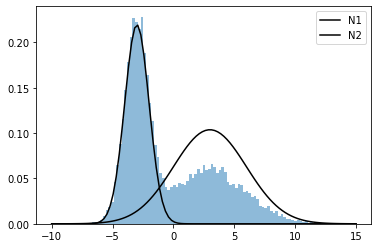

In [7]:
N = 20000;

alpha_val = 0.55;
mu1_val   = -3;
mu2_val   = 3;
sigma1_val= 1;
sigma2_val= 3;

params_true = [alpha_val, [sigma1_val, mu1_val], [sigma2_val, mu2_val]]

N1 = int(np.round((alpha_val * N)));
N2 = int(np.round(((1 - alpha_val) * N)));
v1 = np.random.normal(loc=mu1_val, scale=sigma1_val, size=N1)
v2 = np.random.normal(loc=mu2_val, scale=sigma2_val, size=N2)
dots = np.hstack([v1, v2])

def P(x, sigma, mu, alpha):
    coef = 1 / np.sqrt(2 * np.pi * sigma)
    return alpha * coef * np.exp(- (x-mu)**2 / 2 / sigma**2)

x0 = np.linspace(-10, 15, 100)
plt.hist(dots, bins=100, density=True, alpha=0.5)
plt.plot(x0, P(x0, sigma1_val, mu1_val, alpha_val), color="k", label="N1")
plt.plot(x0, P(x0, sigma2_val, mu2_val, 1-alpha_val), color="k", label="N2")

plt.legend()
plt.show()

In [ ]:
def get_a(x, alpha, vals1, vals2):
    p1 = get_p(x, vals1[0], vals1[1], alpha)
    p2 = get_p(x, vals2[0], vals2[1], 1-alpha)
    
    if p1 >= p2: return 1
    return 2
def init_params():
    alpha_init = np.random.uniform(0.3, 0.7)
    mu1_init = np.random.uniform(-5, -1)
    mu2_init = np.random.uniform(1, 5)
    sigma1_init = np.random.uniform(0.1, 2)
    sigma2_init = np.random.uniform(0.1, 2)
    
    vals1_init = np.array([sigma1_init, mu1_init])
    vals2_init = np.array([sigma2_init, mu2_init])
    return [alpha_init, vals1_init, vals2_init]